In [3]:
import meep as mp
import numpy as np
import math
import cmath


sx = 1
sy = 1
sz = 4
r = 0.238
h = 1.25
dpml = 0.5
eps_si = 3.54**2
eps_pdms = 1.4**2
b_m = 1.4
c_m = 3.54
res = 18
echo = 1000

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = c_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
fcen = 0.5
df = 0.2

theta = math.radians(0)

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)

def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp


src_pos = -(sz/2 - dpml - 0.5)
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 200
trans = sim.add_flux(fcen, df, nfreq, freg)


In [4]:
sim.run(until = echo)
bend = mp.get_fluxes(trans)


-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 9.0/1000.0 = 0.9% done in 4.0s, 440.8s to go
Meep progress: 18.805555555555554/1000.0 = 1.9% done in 8.0s, 417.8s to go
Meep progress: 28.0/1000.0 = 2.8% done in 12.0s, 417.5s to go
Meep progress: 37.22222222222222/1000.0 = 3.7% done in 16.0s, 414.8s to go
Meep progress: 46.75/1000.0 = 4.7% done in 20.0s, 408.7s to go
Meep progress: 55.69444444444444/1000.0 = 5.6% done in 24.1s, 407.9s to go
Meep progress: 63.52777777777777/1000.0 = 6.4% done in 28.1s, 413.6s to go
Meep progress: 70.75/1000.0 = 7.1% done in 32.1s, 421.2s to go
Meep progress: 79.30555555555556/1000.0 = 7.9% done in 36.1s, 418.8s to go
Meep progress: 88.66666666666666/1000.0 = 8.9% done in 40.1s, 411.9s to go
Meep progress: 98.58333333333333/1000.0 = 9.9% done in 44.1s, 403.1s to go
Meep progress: 107.19444444444444/1000.0 = 10.7% done in 48.1s, 400.6s to go
Meep progress: 115.77777777777777/1000.0 = 11.6% done in 52.1s, 398.0s to go
Meep pr

In [ ]:
bend

In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [5]:
sim.reset_meep()

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = mp.Vector3(sx,sy,sz), material=mp.Medium(index=b_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
#nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [6]:
sim.run(until = echo)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 9.36111111111111/1000.0 = 0.9% done in 4.0s, 424.0s to go
Meep progress: 19.0/1000.0 = 1.9% done in 8.0s, 413.6s to go
Meep progress: 28.944444444444443/1000.0 = 2.9% done in 12.0s, 403.0s to go
Meep progress: 37.55555555555555/1000.0 = 3.8% done in 16.0s, 410.5s to go
Meep progress: 45.916666666666664/1000.0 = 4.6% done in 20.0s, 416.0s to go
Meep progress: 55.33333333333333/1000.0 = 5.5% done in 24.0s, 410.3s to go
Meep progress: 65.02777777777777/1000.0 = 6.5% done in 28.0s, 403.2s to go
Meep progress: 74.19444444444444/1000.0 = 7.4% done in 32.0s, 399.9s to go
Meep progress: 83.80555555555556/1000.0 = 8.4% done in 36.1s, 394.1s to go
Meep progress: 93.02777777777777/1000.0 = 9.3% done in 40.1s, 390.5s to go
Meep progress: 102.8611111111111/1000.0 = 10.3% done in 44.1s, 384.2s to go
Meep progress: 112.05555555555554/1000.0 = 11.2% done in 48.1s, 380.8s to go
Meep progress: 121.47222222222221/1000.0 = 12

Meep progress: 952.0555555555555/1000.0 = 95.2% done in 436.7s, 22.0s to go
Meep progress: 961.3055555555555/1000.0 = 96.1% done in 440.7s, 17.7s to go
Meep progress: 970.4444444444443/1000.0 = 97.0% done in 444.7s, 13.5s to go
Meep progress: 979.1944444444443/1000.0 = 97.9% done in 448.7s, 9.5s to go
Meep progress: 988.3055555555555/1000.0 = 98.8% done in 452.7s, 5.4s to go
Meep progress: 997.4722222222222/1000.0 = 99.7% done in 456.7s, 1.2s to go
run 0 finished at t = 1000.0 (36000 timesteps)


In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [8]:
straight

[2.450427197037822e-22,
 2.391281265145376e-22,
 2.318046575501601e-22,
 2.2300404354390758e-22,
 2.126599010711167e-22,
 2.0070815961282959e-22,
 1.870875051748676e-22,
 1.7173983862549116e-22,
 1.5461074773254894e-22,
 1.3564999129476459e-22,
 1.1481199349480168e-22,
 9.205634733640866e-23,
 6.734832430231631e-23,
 4.0659388756733345e-23,
 1.196771501858176e-23,
 -1.8741295834489836e-23,
 -5.147450251153508e-23,
 -8.623051363071559e-23,
 -1.2299918766095855e-22,
 -1.6176114199381489e-22,
 -2.024872777502126e-22,
 -2.4513832047129566e-22,
 -2.896643813685439e-22,
 -3.3600454239175054e-22,
 -3.840864677121962e-22,
 -4.338260460633854e-22,
 -4.851270662089055e-22,
 -5.378809301867436e-22,
 -5.919664067099924e-22,
 -6.472494288461106e-22,
 -7.035829390497118e-22,
 -7.60806785149485e-22,
 -8.187476700605349e-22,
 -8.772191592064392e-22,
 -9.360217477261925e-22,
 -9.949429911516348e-22,
 -1.0537577021644422e-21,
 -1.1122282149204207e-21,
 -1.1701047217823294e-21,
 -1.2271256815227583e-21,


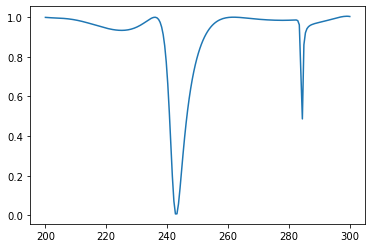

In [10]:
import matplotlib.pyplot as plt
c = 300
p = 0.6
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(0,1)
plt.plot(np.multiply(wl, c/p),Ts)

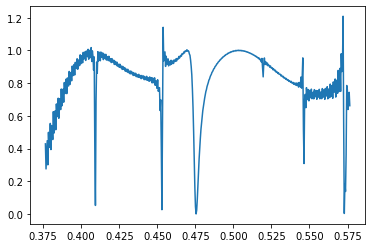